<a href="https://colab.research.google.com/github/PacktPublishing/Modern-Computer-Vision-with-PyTorch-2E/blob/main/Chapter14/Building_Q_table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
%pip install -U "gym==0.26.2"
%pip install torch-snippets

In [2]:
import numpy as np
import gym
import random
env = gym.make('FrozenLake-v1', is_slippery=False, render_mode="rgb_array")

In [3]:
action_size=env.action_space.n
state_size=env.observation_space.n
qtable=np.zeros((state_size,action_size))

In [4]:
episode_rewards = []
for i in range(10000):
    state, *_ = env.reset()
    total_rewards = 0
    for step in range(50):
        action = env.action_space.sample()
        new_state, reward, done, *_ = env.step(action)
        qtable[state,action]+=0.1*(reward+0.9*np.max(qtable[new_state,:])-qtable[state,action])
        state=new_state
        total_rewards+=reward
    episode_rewards.append(total_rewards)
print(qtable)

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


[[0.5314401  0.59048886 0.59048902 0.5314401 ]
 [0.53144007 0.         0.65609893 0.59048899]
 [0.59048896 0.72899885 0.59048854 0.65609889]
 [0.65609865 0.         0.59048806 0.59048822]
 [0.5904888  0.65609877 0.         0.53144008]
 [0.         0.         0.         0.        ]
 [0.         0.80999878 0.         0.65609867]
 [0.         0.         0.         0.        ]
 [0.65609864 0.         0.7289987  0.59048866]
 [0.65609817 0.80999583 0.80999871 0.        ]
 [0.72899539 0.89999887 0.         0.72899767]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.80999176 0.89999745 0.72899052]
 [0.80998192 0.8999914  0.99999952 0.809986  ]
 [0.         0.         0.         0.        ]]


In [5]:
episode_rewards = []
epsilon=1
max_epsilon=1
min_epsilon=0.01
decay_rate=0.005
for episode in range(1000):
    state,*_=env.reset()
    total_rewards = 0
    for step in range(50):
        exp_exp_tradeoff=random.uniform(0,1)
        ## Exploitation:
        if exp_exp_tradeoff>epsilon:
            action=np.argmax(qtable[state,:])
        else:
            ## Exploration
            action=env.action_space.sample()
        new_state,reward,done,*_=env.step(action)
        qtable[state,action]+=0.9*(reward+0.9*np.max(qtable[new_state,:])-qtable[state,action])
        state=new_state
        total_rewards+=reward
    episode_rewards.append(total_rewards)
    epsilon=min_epsilon+(max_epsilon-min_epsilon)*np.exp(decay_rate*episode)
print(qtable)

[[0.531441 0.59049  0.59049  0.531441]
 [0.531441 0.       0.6561   0.59049 ]
 [0.59049  0.729    0.59049  0.6561  ]
 [0.6561   0.       0.59049  0.59049 ]
 [0.59049  0.6561   0.       0.531441]
 [0.       0.       0.       0.      ]
 [0.       0.81     0.       0.6561  ]
 [0.       0.       0.       0.      ]
 [0.6561   0.       0.729    0.59049 ]
 [0.6561   0.81     0.81     0.      ]
 [0.729    0.9      0.       0.729   ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.81     0.9      0.729   ]
 [0.81     0.9      1.       0.81    ]
 [0.       0.       0.       0.      ]]


-----------------------
Episode 0


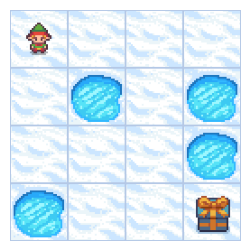

1


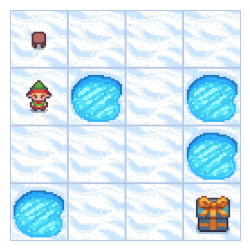

1


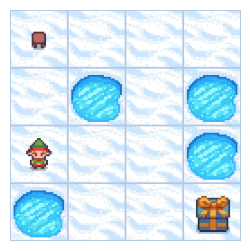

2


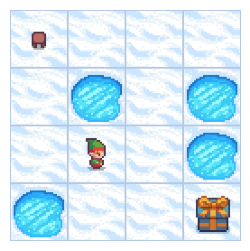

1


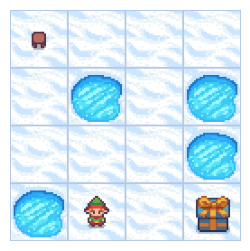

2


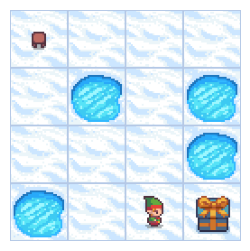

2


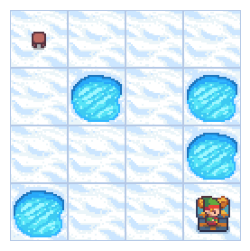

Number of Steps 6


In [19]:
from torch_snippets import show
env.reset()
for episode in range(1):
    state, *_ = env.reset()
    step=0
    done=False
    print("-----------------------")
    print("Episode",episode)
    for step in range(50):
        show(env.render(), sz=3)
        action=np.argmax(qtable[state,:])
        print(action)
        new_state,reward,done,*_=env.step(action)
        if done:
            show(env.render(), sz=3)
            print("Number of Steps", step+1)
            break
        state=new_state
env.close()